<h1>Functions of multiple variables</h1>

<p>This notebook discusses how we can deal with functions $f:R^n \rightarrow R$, that is which take values in $R^n$ and give back a real number. An example would be $f(x,y) = x^2 + y^3$. For the most part we specialize to $n=2$.</p>

<p>For this task, we use the <code>Plots</code> package  for graphing. Additionally, we need the <code>LinearAlgebra</code> package for some vector operations:</p>

In [1]:
using Plots, LinearAlgebra, ForwardDiff

Plots.PyPlotBackend()

<h2>Graphs</h2>

<p>For functions from $R^2$ to $R$, we can visualize them in various ways. We discuss surface plots and contour plots</p>

<h3>Surface plots</h3>

<p>A plot of the set of points $(x ,y, f(x,y))$ is known as a surface plot. These may be graphed with the <code>Plots</code> package.</p>

<p>For a numeric function, we need to create values for $x$, $y$ and then compute a grid of numbers for $f(x,y)$. For example,</p>

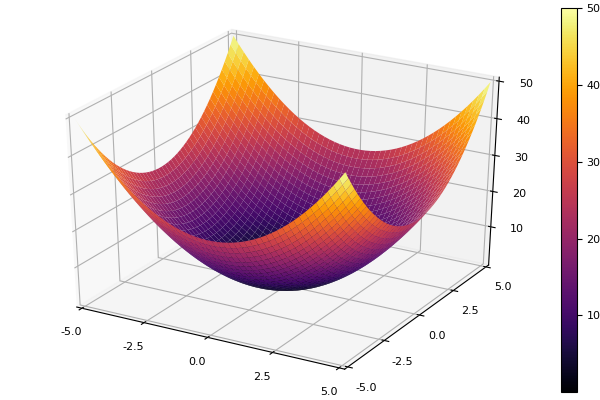

In [1]:

f(x, y) = x^2 + y^2

xs = range(-5, stop=5, length=50)
ys = range(-5, stop=5, length=50)
zs = [f(x,y) for y in ys, x in xs]

surface(xs, ys, zs)

<p>(The third line can be replaced by calling <code>surface&#40;xs, ys, f&#41;</code>.)</p>

<p>Using symbolic values is quite similar, save for the call <code>N.&#40;zs&#41;</code> to make numeric, not symbolic, values:</p>

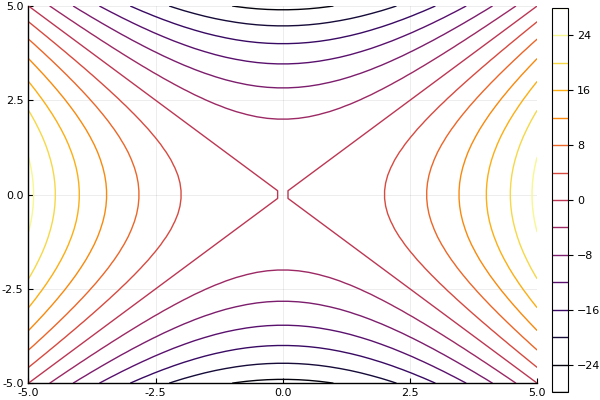

In [1]:
using SymPy
@vars x y real=true
zs = [x^2 - y^2 for y in ys, x in xs]
plot(xs, ys, N.(zs))

<h3>Contour plots</h3>

<p>An alternative plot to a surface plot is the contour plot. These graph in the $x-y$ plane the solutions to $f(x,y) = c$ for different values of $c$. Contour plots in 2D are produced in <code>Plots</code> with the <code>contour</code> function. The same data preparation as <code>surface</code> is used:</p>

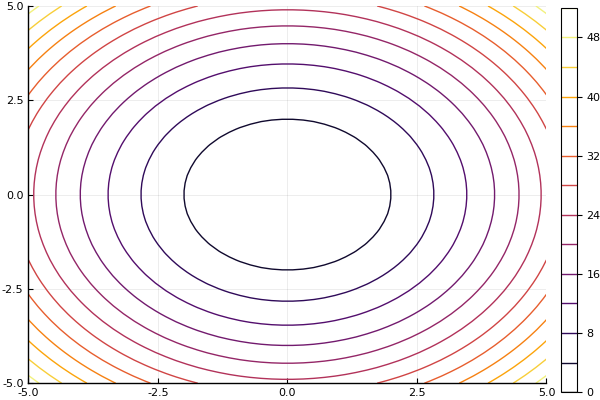

In [1]:
f(x, y) = x^2 + y^2
zs = [f(x,y) for y in ys, x in xs]
contour(xs, ys, zs)

<p>The named argument <code>levels&#61;&#91;a,b,...&#93;</code> will bypass the automatic generation of the levels to plot and will instead plot those corresponding to the vector of values. (Though not all backends respect this argument.)</p>

<h3>Interactive elevation and azimuth adjustment</h3>

<p>Some backends for <code>Plots</code> allows for a selection of the viewing position with a mouse (e.g. <code>plotly&#40;&#41;</code>) but the one for use within the notebook does not. This example shows how to use <code>Interact</code> to mimic that ability.</p>

<p>The viewing elevation and azimuth can be adjusted with the <code>camera&#61;&#40;azimuth, elevation&#41;</code> argument.  (If we were using <a href="http://en.wikipedia.org/wiki/Spherical\_coordinate_system">spherical coordinates</a>, $(\rho, \theta, \phi)$ to describe position, then elevation would be the $90 - \theta$ and azimuth the $\phi$, in degrees.)</p>

<p>Specifying the azimuth and elevation can be made interactive using the <code>Interact</code> package by the following pattern:</p>

In [1]:
f(x, y) = x^2 + y^2
zs = [f(x,y) for y in ys, x in xs]

using Interact

@manipulate for azim in -90:90, elev in 0:90; do
  plot(xs, ys, zs, camera=(azim, elev))
end

<p>The key is to put the drawing commands within the <code>@manipulate</code> call.</p>

<h3>Adding vectors to a plot</h3>

<p>A vector can be added to a plot. As with parametric plots, we utilize this function that allows a vector to be added by specifying the point to anchor the vector at and the vector:</p>

In [1]:
xs_ys(vs) = (A=hcat(vs...); Tuple([A[i,:] for i in eachindex(vs[1])]))
xs_ys(v,vs...) = xs_ys([v, vs...])
xs_ys(r::Function, a, b, n=100) = xs_ys(r.(range(a, stop=b, length=n)))

function arrow!(plt::Plots.Plot, p, v; kwargs...)
  if length(p) == 2
     quiver!(plt, xs_ys([p])..., quiver=Tuple(xs_ys([v])); kwargs...)
  elseif length(p) == 3
    # 3d quiver needs support
    # https://github.com/JuliaPlots/Plots.jl/issues/319#issue-159652535
    # headless arrow instead
    plot!(plt, xs_ys(p, p+v)...; kwargs...)
	end
end
arrow!(p,v;kwargs...) = arrow!(Plots.current(), p, v; kwargs...)

arrow! (generic function with 2 methods)

<p>(Again, this is in the <code>MTH229</code> package.)</p>

<p>Here we draw the contours of some function <code>g</code> with specified levels and add a few vectors:</p>

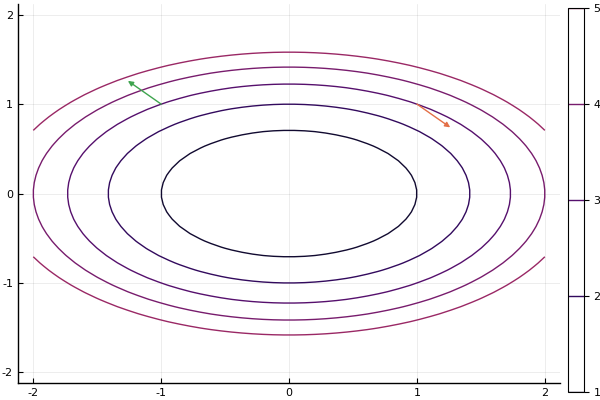

In [1]:
g(x,y) = x^2 + 2y^2
xs = ys = range(-2, stop=2, length=50)
zs = [g(x,y) for y in ys, x in xs]

contour(xs, ys, zs, levels=[1,2,3,4,5])
arrow!([ 1,1], 0.25*[ 1,-1])  ## start at [1,1] in direction [1,-1]
arrow!([-1,1], 0.25*[-1, 1])

<h3>Parametrically described surfaces</h3>

<p>Not all surfaces are easily described by points of the form $(x,y,f(x,y))$ for some function $f$ in the same way as not all 2 dimensional curves are well described by the graph of a function. In the case of two-dimensional curves we parameterized them by describing the $x$ and $y$ position in terms of functions of third variable $t$. In a similar manner we can parameterize a surface, though it takes two variables to describe.</p>

<p>Take for example the task of plotting a sphere. A sphere is most easily described in <a href="http://en.wikipedia.org/wiki/Spherical\_coordinate_system">spherical coordinates</a> which map $(r, \theta, \phi)$ into $(x,y,z)$ by:</p>

In [1]:
## Spherical
X(r,theta,phi) = r * sin(theta) * sin(phi)
Y(r,theta,phi) = r * sin(theta) * cos(phi)
Z(r,theta,phi) = r * cos(theta)

Z (generic function with 1 method)

<p>(We use capital letters, as we have used <code>x</code> and <code>y</code> for symbolic objects previously in this notebook and redefining them as variables causes an error.)</p>

<p><p></p>

<p>We then generate <code>xs</code>, <code>ys</code> and <code>zs</code> by iterating over a region described in terms of $\theta$ and $\phi$, as $r$ is constant for a sphere:</p>

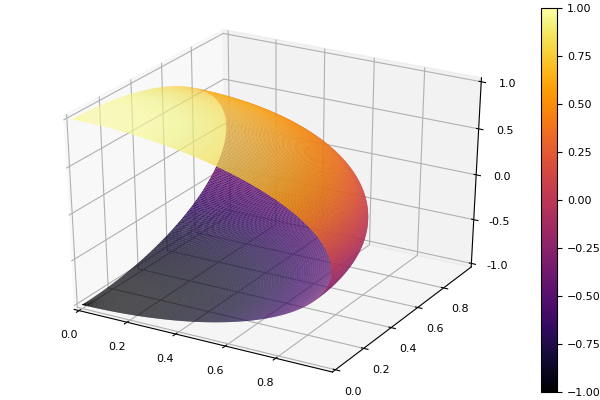

In [1]:
thetas = range(0, stop=pi,   length=250)
phis   = range(0, stop=pi/2, length=250)
xs = [X(1, theta, phi) for theta in thetas, phi in phis]
ys = [Y(1, theta, phi) for theta in thetas, phi in phis]
zs = [Z(1, theta, phi) for theta in thetas, phi in phis]

surface(xs, ys, zs)

<p>The repeating of similar lines to define <code>xs</code>, <code>ys</code>, and <code>zs</code> can be avoided, but it isn't much nicer with this solution:</p>

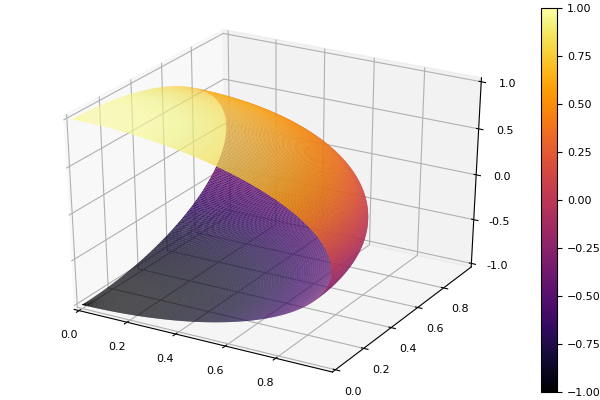

In [1]:
H(theta, phi) = [X(1, theta, phi), Y(1, theta, phi), Z(1, theta, phi)]
out = [ [H(theta, phi)[i] for theta in thetas, phi in phis] for i in 1:3]

surface(out...)

<h3>Tangent planes,</h3>

<p>A plane in 3 dimensions is described by a point and two vectors. The two vectors must be non-collinear, which means their cross product should be non-zero. Though a bit tedious, a graph is easy to make once we parameterize the plane:</p>

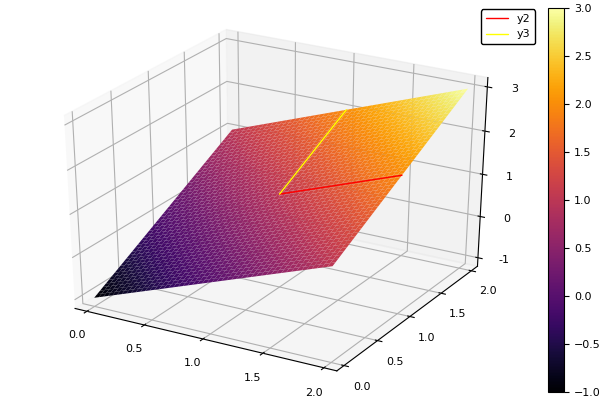

In [1]:
p = [1,1,1]
u = [1,0,1]
v = [0,1,1]
@assert norm(u × v) > 0   # \times<tab> for ×
plane(a,b) = p + a*u + b*v

as = bs = range(-1, stop=1, length=50)

xs = [plane(a, b)[1] for b in bs, a in as]
ys = [plane(a, b)[2] for b in bs, a in as]
zs = [plane(a, b)[3] for b in bs, a in as]

surface(xs, ys, zs)
arrow!(p, u, color="red")
arrow!(p, v, color="yellow")

<h2>Partial derivatives</h2>

<p>For function $f:R^n \rightarrow R$ the concept of a derivative is extended to <em>partial derivatives</em> for $n$ variables. The partial variable of $x$ is defined by holding $y$ constant while a derivative in $x$ is taken.</p>

<p>The definition has:</p>


$$
\frac{\partial f}{\partial x}(x,y) = \lim_{h \rightarrow 0} \frac{f(x + h,y) - f(x,y)}{h}.
$$


<p>The gradient of $f$, $\nabla f$, is the vector-valued function of partial derivatives $[\partial f / \partial x, \partial f / \partial y]$ (taking $R^2$ into $R^2$.)</p>

<p>The <code>ForwardDiff</code> package provides a <code>gradient</code> function for evaluating the gradient at a point. The functions used must take a vector and return a scalar quantity. This requires some redefinitions. For example, we can define $f(x,y) = x^2 -2xy+y^3$ with:</p>

In [1]:
f(x,y) = x^2 - 2x*y + y^3

f (generic function with 1 method)

<p>Or</p>

In [1]:
f(x) = x[1]^2 + 2x[1] * x[2] + x[2]^3

f (generic function with 2 methods)

<p>The latter is a bit harder to read. It is possible to use a trick like this:</p>

In [1]:
f(x,y) = x^2 - 2x*y + y^3
f(x) = f(x...)

f (generic function with 2 methods)

<p>This uses <code>julia</code>'s polymorphism to make the easier to read function and the function taking a vector related.</p>

<p>With this, the gradient at, say <code>x&#61;&#91;1,2&#93;</code> can be found with:</p>

In [1]:
using ForwardDiff
import ForwardDiff: gradient
gradient(f, [1,2])

2-element Array{Int64,1}:
 -2
 10

<p>Compare this answer with that generated by hand (taking partial in $x$ and the partial in $y$):</p>

In [1]:
dx(x,y) = 2x - 2y
dy(x,y) = -2x + 3y^2
(dx(1,2), dy(1,2))

(-2, 10)

<h3>Symbolic partial derivatives</h3>

<p>We can also find partial derivatives using <code>SymPy</code>'s <code>diff</code> function. That second argument to that function is to specify a variable, the third the degree of the derivative (it has a default of 1, so can usually be omitted) . The basic partial derivatives $\partial f/ \partial x$ and $\partial f/ \partial y$ are found as follows:</p>

In [1]:
@vars x y real=true
f(x,y)  = x^2 - 2x*y + y^3
ex = f(x, y)
partial_x = diff(ex, x, 1)
partial_y = diff(ex, y)    # 1 is default degree
[partial_x, partial_y]     # The gradient, or
[diff(ex, s) for s in (x, y)]  # finds gradient in one swoop

<p>The Hessian matrix is a matrix of second partial derivatives. We can find it as follows:</p>

In [1]:
f(x,y)  = x^2 - 2x*y + y^3
ex = f(x, y)

hess = [diff(diff(ex, a), b) for b in (x,y), a in (x,y)]

<p>The Hessian is also available for <code>SymPy</code> objects through <code>sympy.hessian</code>:</p>

In [1]:
sympy.hessian(ex, (x,y))

<p>The gradient is not, so we define a <em>helper</em> function:</p>

In [1]:
Grad(ex::SymPy.Sym, vars=free_symbols(ex)) = [diff(ex, v) for v in vars]

Grad (generic function with 2 methods)

<p>(As <code>gradient</code> is defined in the <code>ForwardDiff</code> package, we avoid a name collision, which can be worked around, by using <code>Grad</code>.)</p>

<h2>Interpreting partial derivatives and the gradient</h2>

<p>The partial derivative in $x$ at a point, $(a,b)$, can be viewed by slicing the graph of $f(x,y)$ with the plane $y=b$. This intersection will result in a function whose derivative is just the partial derivative.</p>

<p>The derivative indicates the slope of the tangent line, so the partial derivative in $x$ at $(a,b)$ indicates the slope of the surface were one constrained to move in the fixed direction $y=b$.</p>

<p>The <strong>directional derivative</strong>, $\nabla_v(f)$, is the slope were one constrained to move in a direction specified by a vector $v$. This generalizes the partial in $x$ where $v$ may be taken to be $c \cdot [1,0]$ and the partial in $y$ where $v$ may be taken to be $c \cdot [0,1]$, for some scalar $c$. For an arbitrary $v$, the partial derivative is defined by a limit of $(f(x + hv) - f(x))/h$ where $x$ and $v$ are vectors, but may be more easily written in terms of the gradient via</p>


$$
\nabla_v f(x) = \nabla(f) \cdot v
$$


<p>The above includes the magnitude of $v$ in its interpretation, where this is the slope of a curve being traversed in the direction of $v$ with speed given by $\| v\|$. It is not uncommon to have a definition in terms of moving at unit speed, as this is more intrinsic to the function $f$.</p>

<h3>Gradient is direction of greatest ascent</h3>

<p>Take $v$ to be a unit vector, then the magnitude of the the directional derivative is</p>


$$
\| \nabla_v(f)(x) \| = \| \nabla(f) \| \sin(\theta)
$$


<p>where $\theta$ is the angle between the gradient and $v$. Taking $v$ in the direction of the gradient will maximize this magnitude. Hence the gradient is in the direction of greatest increase of ascent on the surface.</p>

<p><p></p>

<p>That is, if one is on a hill described by $(x,y,f(x,y))$, then walking so that your $(x,y)$ is in the direction of the gradient will walk in the steepest possible way. Contrast this to walking along a contour, $f(x,y) = k$, which by definition will have no slope up or down, as the $z$ coordinate stays at $k$. In some sense the gradient and the contour are orthogonal concepts. In fact, if we plot, we can see that the gradient is perpendicular to the tangent line of the contour. For example, taking the simple function $f(x,y) = x^2 + y^2$:</p>

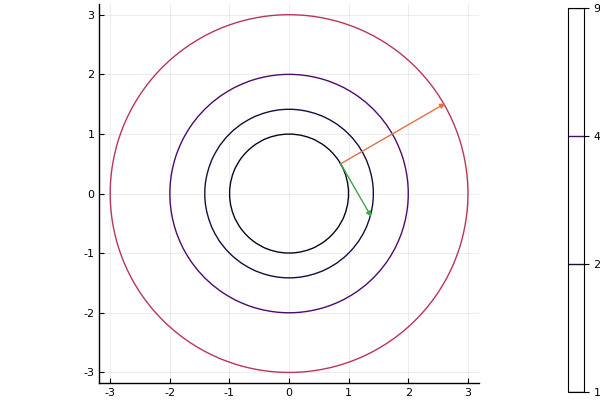

In [1]:
f(x,y) = x^2 + y^2
grad_f(x,y) = [2*x, 2*y]
xs = ys = range(-3, stop=3, length=50)
zs = [f(x,y) for y in ys, x in xs]
contour(xs, ys, zs, levels = [1,2,4,9], aspect_ratio=:equal)

## add gradient
arrow!([sqrt(3)/2,1/2], grad_f(sqrt(3)/2,1/2))

## tangent to contour by implicit differentiation solves 2x + 2y y' = 0
## or y' = -x/y (which is in direction [y, -x])
arrow!([sqrt(3)/2,1/2], [1/2, -sqrt(3)/2])

<p>(The scale of the $x$ and $y$ axis is equal through the extra argument <code>aspect_ratio&#61;:equal</code>.)</p>

<p>Were this not the case, then the directional derivative in a direction of the tangent to the contour would have non-zero magnitude (as the directional derivative is a dot product with the gradient which is non-zero when the two vectors are and the two vectors are not perpendicular). That would mean moving in that direction will have a slope up or down, but that direction is along a contour which is by definition flat.</p>

<h3>Implicit differentiation with SymPy</h3>

<p>The expression above to find the implicit derivative $dy/dx$ for $f(x,y) = x^2 + y^2$ can be done in <code>SymPy</code>, but requires some work. The key is to define a symbolic function, <code>F &#61; SymFunction&#40;&quot;F&quot;&#41;</code> and use that to substitute in for <code>y</code>:</p>

In [1]:
F = SymFunction("F")
@vars x y real=true

ex = x^2 + y^2
tmp = diff(subs(ex, y => F(x)), x)  # x^2 + F(x)^2
ex1 = solve(tmp, diff(F(x),x))    # solve for dF/dx in 2x + 2F(x) dF/dx, gives [-x/F(x)]
tl = subs(ex1[1], F(x) => y)                # now it is [-x/y]

[diff(ex,s) for s in [x,y]] ⋅ [1, tl]      # 0 as orthogonal.

<p>(This uses the fact that the vector <code>&#91;1,m&#93;</code> is parallel to a line with slope <code>m</code>.)</p>

<h3>The chain rule, [G(r(x))' =  ∇G(r(x)) ⋅ r'(x)</h3>

<p>Of course, the last part is of a more general nature. For example, suppose $r(t) = \langle x(t), y(t) \rangle$ parameterizes the contour $G(x,y) = k$. The $(G \circ r)(t) = k$, a constant so would have derivative $0$. But by the chain rule, $0 = \nabla G(x(t), y(t)) \cdot r'(t)$, so the gradient is always perpendicular to the tangent vector, as was the case above.</p>

<h2>Applications</h2>

<p>The fact that the gradient points in the direction of greatest increase can be exploited. The first generalizes the characterization of local extrema for differentiable functions as only occurring when the derivative is zero (a critical point). The same is true for two-dimensional functions, where a critical point would be where the gradient is $0$ length. (By assuming differentiable we avoid talking about those critical points where the derivative is undefined, such as at a cusp.)</p>

<h3>Optimization</h3>

<p>The definition of a <em>local maximum</em> of a function $f$ is not much different when $f:R^n \rightarrow R$ for $n = 2$ than the $n=1$ case: $f(a,b)$ is a local maximum of $f$ if $f(a,b) \geq f(x,y)$ for any $(x,y)$ in an open disk about $(a,b)$. That is, the value $f(a,b)$ is the largest in some nearby neighborhood, at least. Using a mountain analogy, this can be the ultimate peak, or a lower peak, it just needs to be the tallest value in some (open) region. A <em>local minimum</em> has a similar defintion.</p>

<p><p></p>

<p>If $f$ is differentiable and $(a,b)$ is an interior point of the domain, then one has at a local extrema that <em>both</em> partial derivatives will be 0. This is a direct analogue of the $n=1$ case.</p>

<p><p></p>

<p>However, as with the $n=1$ case, it is not enough to know that both partials are $0$ to conclude you are at a local extrema. An example where this is not the case is a saddle point. The function $f(x,y) = y^2 - y^4 - x^2$ demonstrates this at $0$.</p>

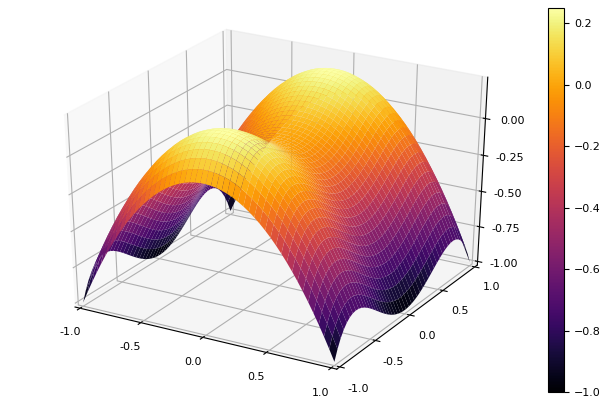

In [1]:
f1(x,y) = y^2 - y^4 - x^2

xs = ys = range(-1, stop=1, length=50)
zs = [f1(x,y) for y in ys, x in xs]
surface(xs, ys, zs)

<p>There is a <a href="https://en.wikipedia.org/wiki/Second_partial_derivative_test">test</a> though that involves the Hessian, whose determinant is $d = f_{xx}f_{yy} - f_{xy}^2$:</p>

<ul>
<li><p>The function $f$ has a local maximum if $f_{xx} < 0$ and $d > 0$</p>
</li>
<li><p>The function $f$ has a local minimum if $f_{xx} > 0$ and $d > 0$</p>
</li>
<li><p>The function $f$ has a saddle point if $d < 0$</p>
</li>
<li><p>The test is otherwise inconclusive.</p>
</li>
</ul>

<p>(The second derivative test when $n=1$ is similar to the first, second and fourth statements without consideration of $d$.)</p>

<p>Let's see this in use: maximize $g(x,y) = 2 + 2x + 2y - x^2 - y^2$ over the triangular region bounded by $x=0$, $y=0$ and $y=9-x$.</p>

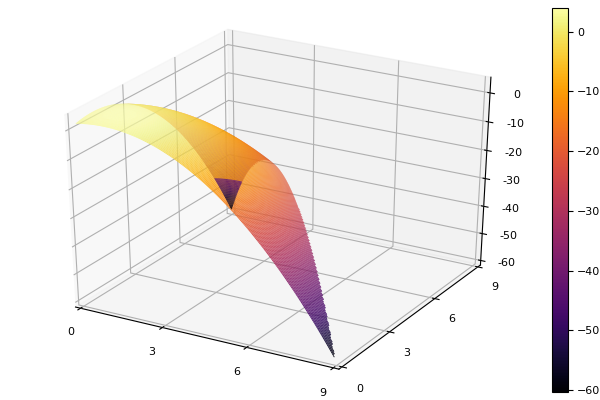

In [1]:
g(x,y) =  2 + 2x + 2y - x^2 - y^2
h(x,y) = (x>0) & (y>0) & (y < 9-x) ? g(x,y) : NaN

xs = ys = range(0, stop=9, length=250)
zs = [h(x,y) for y in ys, x in xs]

surface(xs, ys, zs)

<p>We can see that the maximum occurs near the origin, and not out at the edge. Let's find it symbolically:</p>

In [1]:
@vars x y real=true
grad = [diff(g(x,y), x), diff(g(x,y),y)]
solve(grad)

Dict{Any,Any} with 2 entries:
  x => 1
  y => 1

<p>The answer of $y=1$ gives $x=1$ is in the region and has a zero gradient, as we can check by substituting in these values for $x$ and $y$ in the gradient expression:</p>

In [1]:
subs.(grad, x => 1, y => 1)

<p>The value of $g_{xx}$ is the upper left value which is $-2$. By the theorem, the value $(1,1)$ will correspond to a local maximum if the determinant is positive, and it is:</p>

In [1]:
hess = sympy.hessian(g(x,y), (x,y))
det(hess)

<p>The relative maximum is the value:</p>

In [1]:
g(1,1)

4

<p>Is this the maximum value over the region? For that, we need to check the boundary of the region, that is when $x=0$ or $y=0$ or $y=9-x$. This is (tediously) done in three steps:</p>

<ul>
<li><p>Check the values with $x=0$. Then we have the function $h(y) = g(0,y)$ over $[0,9]$. This function of a single variable and it has a larger value would occur at an endpoint or a critical point:</p>
</li>
</ul>

In [1]:
h(y) = g(0,y)
out = solve(diff(h(y), y))
append!(out, [0, 9])
h.(out)

<p>Nope, nothing bigger than $4$.</p>

<ul>
<li><p>Check the values with $y=0$. Then we have $h(x) = g(x,0)$ over $[0,9]$. Repeating gives the same answer:</p>
</li>
</ul>

In [1]:
h(x) = g(x,0)
out = solve(diff(h(x), x))
append!(out, [0, 9])
h.(out)

<p>(You could skip this last one by noting the $x$ and $y$ enter symmetrically.</p>

<ul>
<li><p>Check values $y = 9-x$. Here we parameterize by $t$ going from $0$ to $9$:</p>
</li>
</ul>

In [1]:
@vars t

h(t) = g(t, 9-t)
out = solve(diff(h(t), t))
append!(out, [0, 9])
h.(out)

<p>Again, all these values are less than $4$, so we can conclude that $4$ is a local maximum and the absolute maximum over the region.</p>

<h3>Lagrange multipliers</h3>

<p>Unconstrained optimization is related to the gradient. A related, but different question is constrained optimization. A generic description would be along the lines of</p>

<blockquote>
<p>Maximize $f(x,y)$ given $g(x,y) = k$.</p>
</blockquote>

<p>For this problem the gradient of $f$ may never be $0$ along the contour of $g$. However, a maximal value will be determined by the gradient. For example, the gradient of $f$ should be perpendicular to the contour lines of $g$, as otherwise we could move in the direction of the projection of the gradient of $f$ onto the tangent of the contour line of $g$ and increase our function. However, the gradient of $g$ is also perpendicular to the tangent of the contour lines of $g$, so in fact we need the gradient of $f$ and the gradient of $g$ to be parallel.</p>

<p>That is, in addition to satisfying the constraint, a <em>necessary</em> condition for an optimal value is for some $\lambda$ that:</p>


$$
\nabla f(x,y) = \lambda \nabla g(x,y).
$$


<p>This is the basis for the technique of <a href="http://en.wikipedia.org/wiki/Lagrange\_multiplier">Lagrange Multipliers</a>.</p>

<p><p></p>

<p>The following graphic illustrates the method for the problem where we maximize $f(x,y) = 5 + x + y^2$ over the constraint formed by $g(x,y) = x^2 + y^2 = 1$. We make a contour plot, then draw for a few points the gradient of $f$ and the gradient of $g$. When the arrows are parallel, we have a possible maxima. In the figure this occurs at $\pi/3$.</p>

In [1]:
g(x,y) = x^2 + y^2
∇g(x,y) = [2x, 2y]

f(x,y) = 5 + x + y^2
∇f(x,y) = [1, 2*y]

uvec(u) = u/norm(u)

xs = ys = range(-3, stop=3, length=50) ## should be square!
ts = [0, pi/6, pi/3, pi/2]
zcs = [g(x,y) for y in ys, x in xs]

p = contour(xs, ys, zcs,  levels=[1,4,9])

## parameterize g(x,y) == 1
rad(t) = [cos(t), sin(t)]

for t in ts
    arrow!(p, rad(t), uvec(∇g(rad(t)...)), color=:blue)
    arrow!(p, rad(t), uvec(∇f(rad(t)...)), color=:red )
end

p

<p>To solve this problem algebraically, we can use <code>SymPy</code> as follows:</p>

In [1]:
using SymPy
@vars x y real=true

f(x,y) = 5 + x + y^2
g(x,y) = x^2 + y^2
gradf = Grad(f(x,y), [x,y])    # add [x,y] to ensure order
gradg = Grad(g(x,y), [x,y])
[gradf gradg]   # gradf in first column, gradg in second

<p>We see from the first row that <code>1 &#61; \ambda 2x</code> and from the second <code>2y&#61; lambda 2y</code>. If $y=0$, then $1 = \lambda 2 x$ can have $x$ take any value. Similarly, If $x=1/2$ then $\lambda=1$ and from $2y=1\cdot 2y$, we see that $y$ can take any value. However, the constraint imposed by $g(x,y)=1$ limits the values in each case giving us 4 possible answers: $(1,0)$, $(-1,0)$, $(1/2, \sqrt{3}/2)$ and $(1/2, -\sqrt{3}/2)$. Of these, the latter two can be seen to be associated with the maximum values along the constraint, the second is the minimum and the first a local minimum.</p>

<p><p></p>

<p>We could use <code>SymPy</code>'s <code>solve</code> feature to do this directly. First we introduce a <code>lambda</code> variable and then using the multi-variable form of <code>solve</code>:</p>

In [1]:
@vars lambda real=true
out = solve(gradf - lambda * gradg)

1-element Array{Dict{Any,Any},1}:
 Dict(lambda=>1,x=>1/2)

<p>We see that the <code>x&#61;1/2</code> case is found, but we miss the $y=0$ case. To use the constraint to find $y$, we have:</p>

In [1]:
ex = subs(g(x,y), x => 1//2) # or out[1][x] to fish out the 1/2
solve(ex - 1, y)           # two answers

<p>The value of $(1/2, \sqrt{3}/2)$ corresponds to an azimuth of 60 degrees, as expected, and can be checked to be a maximum, as can the value $(1/2, -\sqrt{3}/2)$.</p>

<p><p></p>

<p>It can be simpler to solve this by adding the constraint as an equation. We do this here by pushing it onto the equations to solve:</p>

In [1]:
exs = gradf - lambda * gradg

In [1]:
push!(exs, g(x,y) - 1)
out = solve(exs)

4-element Array{Dict{Any,Any},1}:
 Dict(lambda=>-1/2,x=>-1,y=>0)       
 Dict(lambda=>1/2,x=>1,y=>0)         
 Dict(lambda=>1,x=>1/2,y=>-sqrt(3)/2)
 Dict(lambda=>1,x=>1/2,y=>sqrt(3)/2) 

<p>The display of the values is not very good, but the output gives four answers which we can check via:</p>

In [1]:
[f(o[x], o[y]) for o in out]

<p>The second and third (with <code>x&#61;1/2</code>) are the largest, the one with <code>x&#61;-1</code> the smallest, and the one with <code>x&#61;1</code> a local extrema, but not an extrema over the entire set of values specified by the constraint.</p>

<p><p></p>

<p>The <a href="https://www.cs.iastate.edu/~cs577/handouts/lagrange-multiplier.pdf">Langragian</a> associated with the constrained problem is $l(x,y,\lambda) = f(x,y) - \lambda h(x,y)$, where $h(x,y) = g(x,y) - k$. The solutions to $\nabla l = 0$ are the same as above.</p>

<h3>Some more examples</h3>

<blockquote>
<p>Find the maximal volume of box with fixed surface area of 64 square units (problem is from <a href="http://tutorial.math.lamar.edu/Classes/CalcIII/LagrangeMultipliers.aspx">Paul's Online Math Notes</a> ).</p>
</blockquote>

In [1]:
@vars a b c real=true

Vol(a,b,c) = a*b*c
SA(a,b,c) = 2*(a*b + a*c + b*c)

gradf = Grad(Vol(a,b,c), [a,b,c])
gradg = Grad(SA(a,b,c),  [a,b,c])

[gradf  gradg]   # gradf in first column,...

<p>What is $\lambda$? Here we add the constraint to the equations and let <code>SymPy</code> do the work.</p>

In [1]:
@vars lambda  real=true

exs = gradf - lambda * gradg
push!(exs, SA(a,b,c) - 64)
out = solve(exs, [lambda, a, b, c])
out[2]

(sqrt(6)/3, 4*sqrt(6)/3, 4*sqrt(6)/3, 4*sqrt(6)/3)

<p>The two answers differ only by minus signs. Only the second is possible and yields a cube with sides of length $4\sqrt{6}/3$.</p>

<blockquote>
<p>Find the minimal surface area of a box with fixed volume 64 cubic units (problem is from <a href="http://tutorial.math.lamar.edu/Classes/CalcIII/LagrangeMultipliers.aspx">Paul's Online Math Notes</a> ).</p>
</blockquote>

<p>The basic equations are identical, save for the constraint being switched. We have then:</p>

In [1]:
@vars a b c real=true
@vars lambda  real=true

Vol(a,b,c) = a*b*c
SA(a,b,c) = 2*(a*b + a*c + b*c)

gradf = Grad(Vol(a,b,c), [a,b,c])
gradg = Grad(SA(a,b,c),  [a,b,c])

exs = gradf - lambda * gradg
push!(exs, Vol(a,b,c) - 64)

<p>And now</p>

In [1]:
solve(exs)

1-element Array{Dict{Any,Any},1}:
 Dict(lambda=>1,c=>4,a=>4,b=>4)

<p>This too has a solution which is a cube, here with side lengths of 4. However, note we minimized here, but maximized in the previous question.</p>

<blockquote>
<p>A right circular can is to hold 355 $mm^3$. Find the dimensions of the radius, $r$, and height, $h$, that minimize surface area. (Problem modified from one <a href="http://math.etsu.edu/multicalc/prealpha/Chap2/Chap2-9/printversion.pdf">here</a>.)</p>
</blockquote>

In [1]:
@vars radius height real=true
@vars lambda real=true

Vol(r,h) = PI*r^2* h
SA(r,h) = 2*PI*r^2 + 2*PI*r*h
gradf = Grad(Vol(radius, height), [radius, height])
gradg = Grad(SA(radius, height),  [radius, height])


exs = gradf - lambda * gradg
push!(exs, Vol(radius,height) - 355)

In [1]:
solve(exs)[1]

Dict{Any,Any} with 3 entries:
  radius => 2^(2/3)*355^(1/3)/(2*pi^(1/3))
  lambda => 2^(2/3)*355^(1/3)/(4*pi^(1/3))
  height => 2^(2/3)*355^(1/3)/pi^(1/3)

<p>(There is only one answer, so we use <code>&#91;1&#93;</code> to display just that, as otherwise the display is not great.)</p>

<p>If we had solved without adding the extra constraint, we see the relationship between <code>h</code> and <code>r</code> more clearly:</p>

In [1]:
solve(gradf - lambda * gradg)[3]  # third one has answer

Dict{Any,Any} with 2 entries:
  radius => 0
  lambda => 0

<p>That <code>height&#61;2 radius</code> says the profile of this can is a square with height equal to the diameter.</p>